# The MNIST Dataset

The MNIST dataset is a standard dataset containing hand-written digits of a reasonably sized population of US citizens. It is mainly used for classification purposes. In the current notebook we'll ne looking into clustering the dataset.

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="./datasets")

In [2]:
fetch_mldata?

In [4]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

The MNIST dataset is composed of vectorized images each represented by a $(1, 784)$ shaped array. For each such entry one gets a `target` entry corresponding to the digit the image represents.   

In [6]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [7]:
X, y = mnist["data"], mnist["target"]

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
def show_image(serial):
    image = serial.reshape(28, 28)
    plt.imshow(image)
    
    plt.axis("off")
    plt.show()

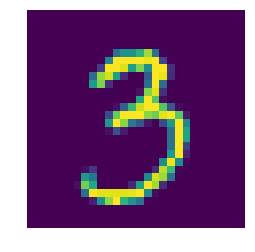

In [12]:
digit_3 = X[20000]
show_image(digit_3)

## Assignment

Read the `scikit-learn` documentation about clustering and try looking into at least two different clustering strategies for the MNIST dataset.

In each case:
- Do the clusters make sense?

You can start by reading code available [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py). Make sure you understand its purpose.


In [25]:
from sklearn.cluster import KMeans

In [30]:
KMeans?

In [31]:
KMeans.fit?

In [32]:
kmean = KMeans(n_clusters=10)

In [33]:
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
kmean.labels_[:100]

array([8, 8, 3, 3, 8, 8, 8, 5, 5, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8,
       8, 5, 5, 8, 4, 8, 5, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 8, 5, 8, 3, 8, 3, 8, 3, 8, 3, 3,
       5, 8, 8, 8, 8, 3, 8, 8, 3, 3, 8, 8, 8, 8, 3, 3, 8, 8, 3, 8, 3, 3,
       3, 3, 8, 9, 3, 3, 3, 8, 3, 9, 3, 8], dtype=int32)

In [41]:
kmean.labels_[y == 0].shape 

(6903,)

In [42]:
labels_0 = kmean.labels_[y == 0]

(array([9.000e+00, 7.000e+00, 4.000e+00, 1.242e+03, 1.670e+02, 2.910e+02,
        3.800e+01, 1.000e+00, 5.066e+03, 7.800e+01]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

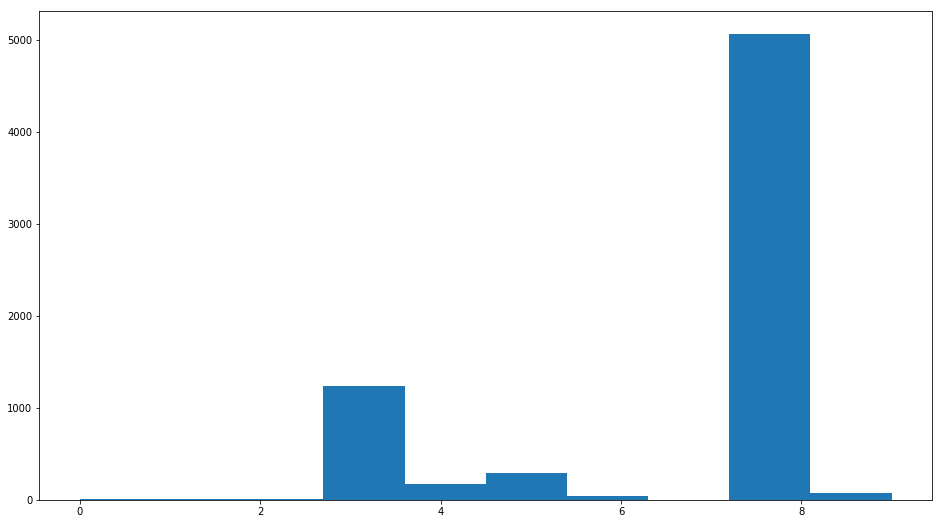

In [45]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.hist(labels_0)